In [94]:
# Import Libraries

from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pylab as plt

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold #GridSearch is for hyperparameter tuning
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, FunctionTransformer, label_binarize
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, f1_score, accuracy_score, precision_score, recall_score, PrecisionRecallDisplay, RocCurveDisplay, make_scorer, mean_squared_error,classification_report,confusion_matrix,ConfusionMatrixDisplay, roc_curve, auc,roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/darrens2k/intro-to-data-science/main/Final%20Exam/churn_data.csv')

In [5]:
df.info(42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              10000 non-null  int64  
 1   CustomerID              10000 non-null  int64  
 2   Age                     10000 non-null  int64  
 3   Location                10000 non-null  object 
 4   Device                  10000 non-null  object 
 5   Month_1_Spend           10000 non-null  float64
 6   Month_1_Items           10000 non-null  int64  
 7   Month_1_Support_Calls   10000 non-null  int64  
 8   Month_2_Spend           10000 non-null  float64
 9   Month_2_Items           10000 non-null  int64  
 10  Month_2_Support_Calls   10000 non-null  int64  
 11  Month_3_Spend           10000 non-null  float64
 12  Month_3_Items           10000 non-null  int64  
 13  Month_3_Support_Calls   10000 non-null  int64  
 14  Month_4_Spend           10000 non-null 

In [6]:
df.head()

,Unnamed: 0,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
0,0,1,46,US,iOS,756.005761,39,2,582.023075,92,...,280.397827,60,0,700.181510,66,3,382.719682,59,0,1
1,1,2,52,US,iOS,594.838157,59,0,251.269898,33,...,863.000645,89,1,571.331352,28,3,570.203975,89,0,1
2,2,3,43,Canada,Android,453.217405,21,3,124.178946,92,...,858.545990,60,5,198.222684,38,1,187.475764,79,5,1
3,3,4,41,US,iOS,621.453170,95,1,134.362559,46,...,404.590146,59,3,565.395592,78,1,281.415092,63,4,1
4,4,5,41,US,iOS,660.735119,48,5,713.265527,54,...,178.143438,85,1,574.382094,34,2,544.981985,28,2,1


In [8]:
df['Churn'].value_counts()

Churn
1    7000
0    3000
Name: count, dtype: int64

In [9]:
df.groupby('Location')['Churn'].value_counts()

Location       Churn
Australia      0         725
Canada         1        3495
               0         763
Great Britain  0         762
US             1        3505
               0         750
Name: count, dtype: int64

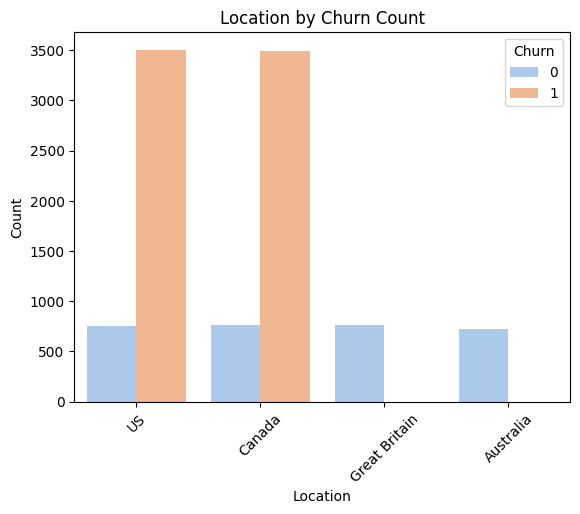

In [14]:
sns.countplot(x='Location', hue='Churn', data=df, palette='pastel')
plt.title('Location by Churn Count')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Define the age bins and labels
bins = [18, 35, 50, 65, float('inf')]
labels = ['18-34', '35-49', '50-64', '65+']

# Create the age bins and label them
df['age_bins'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

df['age_bins'].value_counts()

age_bins
35-49    3511
50-64    3310
18-34    3096
65+        83
Name: count, dtype: int64

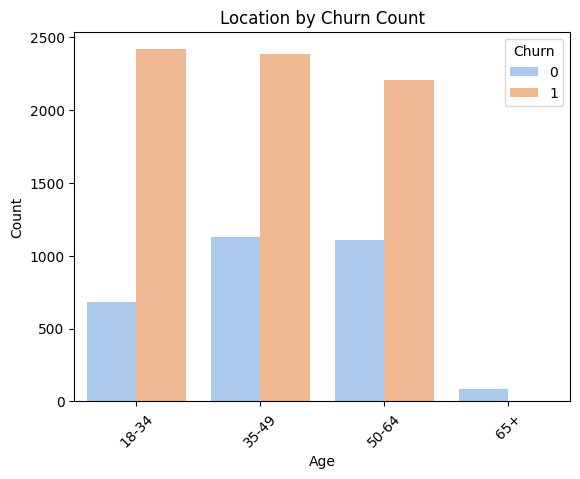

In [18]:
sns.countplot(x='age_bins', hue='Churn', data=df, palette='pastel')
plt.title('Location by Churn Count')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [22]:
df['avg_monthly_spend'] = (df['Month_1_Spend'] + df['Month_2_Spend'] + df['Month_3_Spend'] + df['Month_4_Spend'] + df['Month_5_Spend'] + df['Month_6_Spend'] + df['Month_7_Spend'] + df['Month_8_Spend'] + df['Month_9_Spend'] + df['Month_10_Spend'] + df['Month_11_Spend'] + df['Month_12_Spend']) / 12

df.head()

,Unnamed: 0,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,...,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn,age_bins,avg_monthly_spend
0,0,1,46,US,iOS,756.005761,39,2,582.023075,92,...,0,700.181510,66,3,382.719682,59,0,1,35-49,568.983464
1,1,2,52,US,iOS,594.838157,59,0,251.269898,33,...,1,571.331352,28,3,570.203975,89,0,1,50-64,446.081453
2,2,3,43,Canada,Android,453.217405,21,3,124.178946,92,...,5,198.222684,38,1,187.475764,79,5,1,35-49,422.393677
3,3,4,41,US,iOS,621.453170,95,1,134.362559,46,...,3,565.395592,78,1,281.415092,63,4,1,35-49,436.612547
4,4,5,41,US,iOS,660.735119,48,5,713.265527,54,...,1,574.382094,34,2,544.981985,28,2,1,35-49,460.925228


In [24]:
df['total_spend'] = df['Month_1_Spend'] + df['Month_2_Spend'] + df['Month_3_Spend'] + df['Month_4_Spend'] + df['Month_5_Spend'] + df['Month_6_Spend'] + df['Month_7_Spend'] + df['Month_8_Spend'] + df['Month_9_Spend'] + df['Month_10_Spend'] + df['Month_11_Spend'] + df['Month_12_Spend']

df.head()

,Unnamed: 0,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,...,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn,age_bins,avg_monthly_spend,total_spend
0,0,1,46,US,iOS,756.005761,39,2,582.023075,92,...,700.181510,66,3,382.719682,59,0,1,35-49,568.983464,6827.801568
1,1,2,52,US,iOS,594.838157,59,0,251.269898,33,...,571.331352,28,3,570.203975,89,0,1,50-64,446.081453,5352.977440
2,2,3,43,Canada,Android,453.217405,21,3,124.178946,92,...,198.222684,38,1,187.475764,79,5,1,35-49,422.393677,5068.724122
3,3,4,41,US,iOS,621.453170,95,1,134.362559,46,...,565.395592,78,1,281.415092,63,4,1,35-49,436.612547,5239.350565
4,4,5,41,US,iOS,660.735119,48,5,713.265527,54,...,574.382094,34,2,544.981985,28,2,1,35-49,460.925228,5531.102731


<Axes: ylabel='total_spend'>

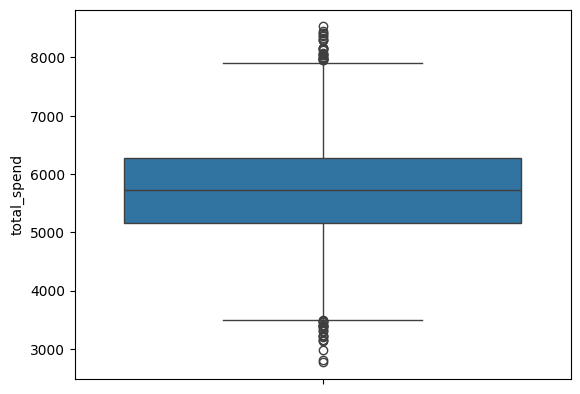

In [25]:
sns.boxplot(df['total_spend'])

<Axes: ylabel='avg_monthly_spend'>

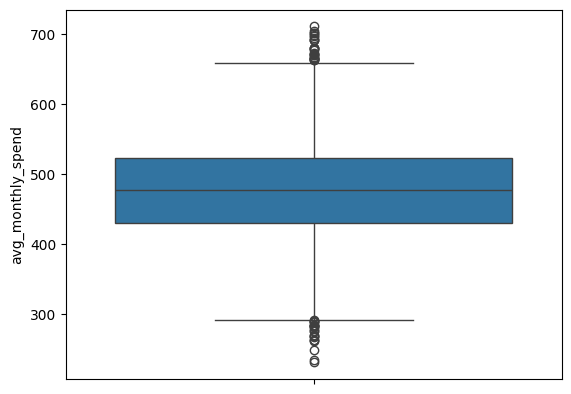

In [26]:
sns.boxplot(df['avg_monthly_spend'])

In [27]:
df['total_spend'].describe()

count    10000.000000
mean      5721.062831
std        816.715207
min       2767.977342
25%       5161.294631
50%       5723.988719
75%       6275.007443
max       8531.567759
Name: total_spend, dtype: float64

In [29]:
# We want to predict ranges of total spend (LTV_cat) for better use in model output

# Define the LTV bins and labels(25%,50%,75%,infinity)
ltv_bins = [0, 5161.29, 5723.98,6275.007443, float('inf')]
ltv_labels = ['Low', 'Medium', 'High', 'Very High']

# Create the LTV_cat column in the transaction_level DataFrame
df['LTV_cat'] = pd.cut(df['total_spend'], bins=ltv_bins, labels=ltv_labels, right=False)

In [30]:
df['LTV_cat'].value_counts()

LTV_cat
Low          2500
Medium       2500
High         2500
Very High    2500
Name: count, dtype: int64

In [31]:
df.columns

Index(['Unnamed: 0', 'CustomerID', 'Age', 'Location', 'Device',
       'Month_1_Spend', 'Month_1_Items', 'Month_1_Support_Calls',
       'Month_2_Spend', 'Month_2_Items', 'Month_2_Support_Calls',
       'Month_3_Spend', 'Month_3_Items', 'Month_3_Support_Calls',
       'Month_4_Spend', 'Month_4_Items', 'Month_4_Support_Calls',
       'Month_5_Spend', 'Month_5_Items', 'Month_5_Support_Calls',
       'Month_6_Spend', 'Month_6_Items', 'Month_6_Support_Calls',
       'Month_7_Spend', 'Month_7_Items', 'Month_7_Support_Calls',
       'Month_8_Spend', 'Month_8_Items', 'Month_8_Support_Calls',
       'Month_9_Spend', 'Month_9_Items', 'Month_9_Support_Calls',
       'Month_10_Spend', 'Month_10_Items', 'Month_10_Support_Calls',
       'Month_11_Spend', 'Month_11_Items', 'Month_11_Support_Calls',
       'Month_12_Spend', 'Month_12_Items', 'Month_12_Support_Calls', 'Churn',
       'age_bins', 'avg_monthly_spend', 'total_spend', 'LTV_cat'],
      dtype='object')

In [44]:
df['avg_monthly_support'] = (df['Month_1_Support_Calls'] + df['Month_2_Support_Calls'] + df['Month_3_Support_Calls'] + df['Month_4_Support_Calls']
                             + df['Month_5_Support_Calls'] + df['Month_6_Support_Calls'] + df['Month_7_Support_Calls'] + df['Month_8_Support_Calls']
                             + df['Month_9_Support_Calls'] + df['Month_10_Support_Calls'] + df['Month_11_Support_Calls'] + df['Month_12_Support_Calls']) /12

In [45]:
df.head()

,Unnamed: 0,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,...,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn,age_bins,avg_monthly_spend,total_spend,LTV_cat,avg_monthly_support
0,0,1,46,US,iOS,756.005761,39,2,582.023075,92,...,3,382.719682,59,0,1,35-49,568.983464,6827.801568,Very High,1.916667
1,1,2,52,US,iOS,594.838157,59,0,251.269898,33,...,3,570.203975,89,0,1,50-64,446.081453,5352.977440,Medium,1.833333
2,2,3,43,Canada,Android,453.217405,21,3,124.178946,92,...,1,187.475764,79,5,1,35-49,422.393677,5068.724122,Low,2.666667
3,3,4,41,US,iOS,621.453170,95,1,134.362559,46,...,1,281.415092,63,4,1,35-49,436.612547,5239.350565,Medium,2.166667
4,4,5,41,US,iOS,660.735119,48,5,713.265527,54,...,2,544.981985,28,2,1,35-49,460.925228,5531.102731,Medium,1.666667


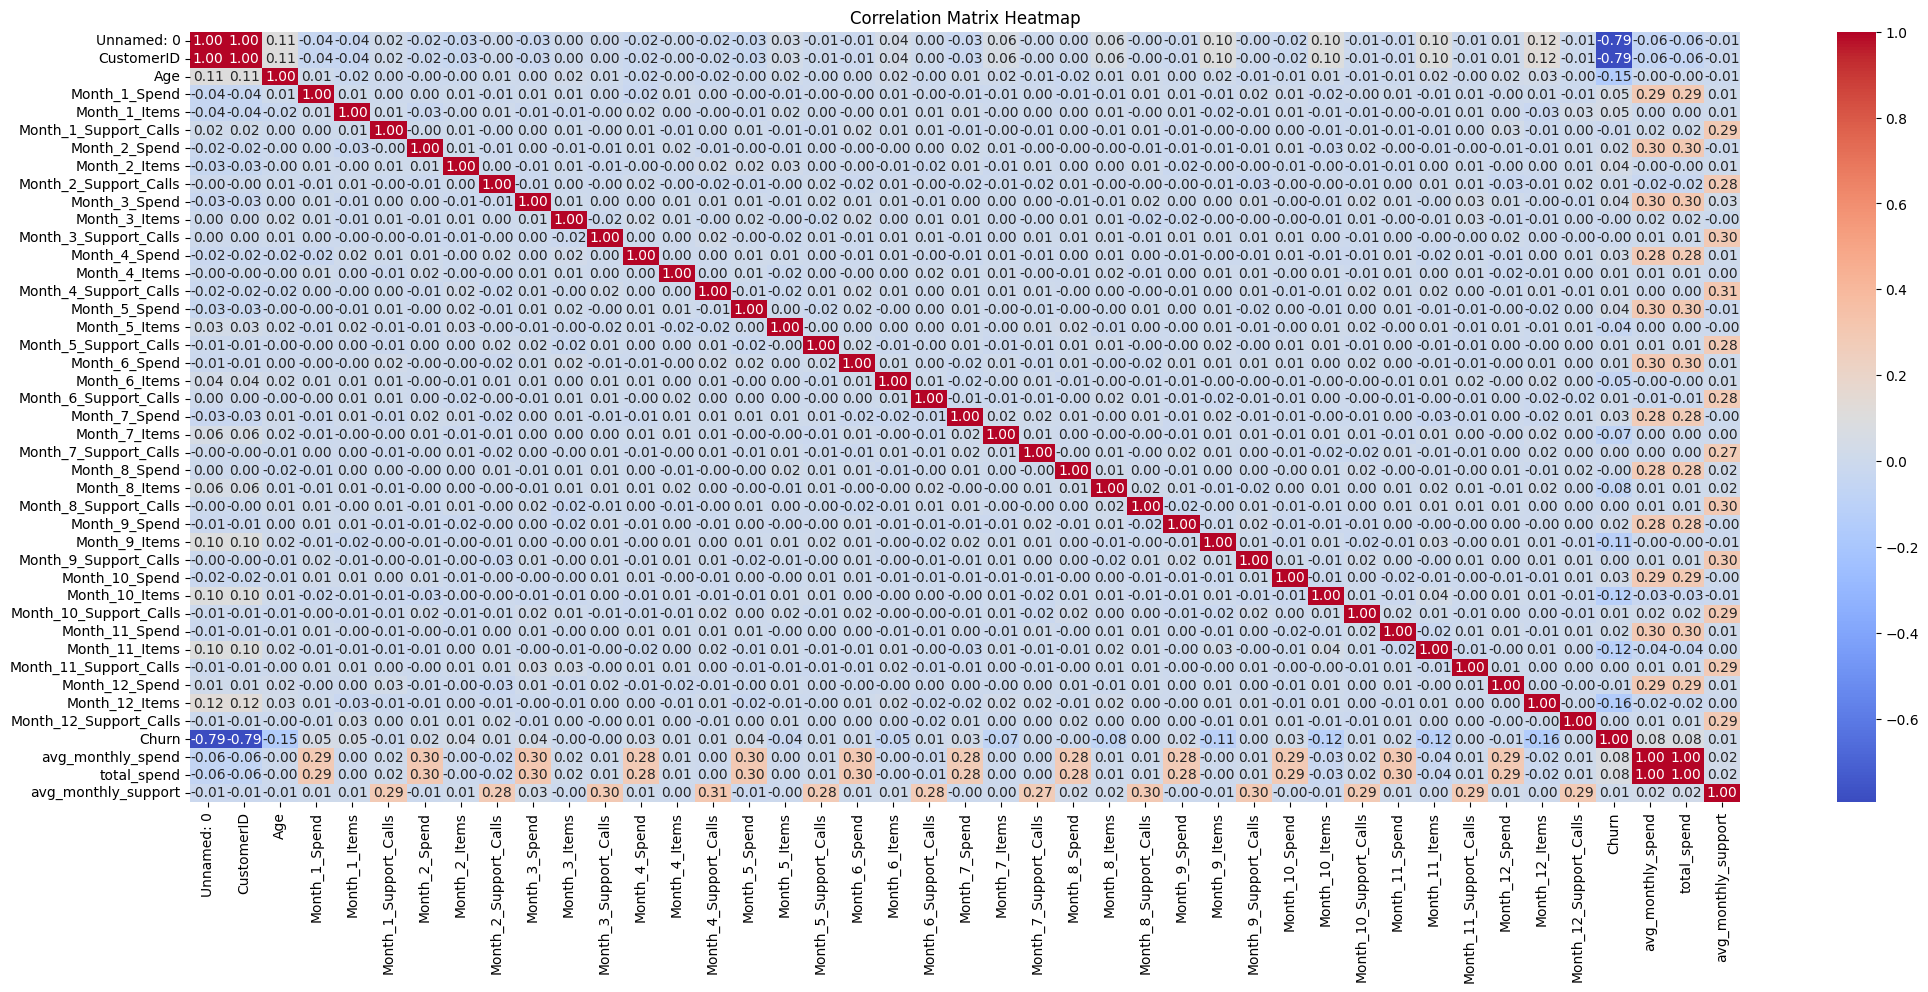

In [72]:
# heatmap of correlation matrix
plt.figure(figsize=(25, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [46]:
# Split Data for Model - Predict LTV Category (Multi-Class)

X = df[['Location', 'Device',
       'Month_1_Items', 'Month_1_Support_Calls',
       'Month_2_Items', 'Month_2_Support_Calls',
       'Month_3_Items', 'Month_3_Support_Calls',
       'Month_4_Items', 'Month_4_Support_Calls',
       'Month_5_Items', 'Month_5_Support_Calls',
       'Month_6_Items', 'Month_6_Support_Calls',
       'Month_7_Items', 'Month_7_Support_Calls',
       'Month_8_Items', 'Month_8_Support_Calls',
       'Month_9_Items', 'Month_9_Support_Calls',
       'Month_10_Items', 'Month_10_Support_Calls',
       'Month_11_Items', 'Month_11_Support_Calls',
       'Month_12_Items', 'Month_12_Support_Calls', 'Churn', 'age_bins','avg_monthly_support']]
y = df['LTV_cat']

numeric_columns = ['Month_1_Items', 'Month_1_Support_Calls', 'Month_2_Items', 'Month_2_Support_Calls',
                   'Month_3_Items', 'Month_3_Support_Calls', 'Month_4_Items', 'Month_4_Support_Calls', 'Month_5_Items', 'Month_5_Support_Calls',
                   'Month_6_Items', 'Month_6_Support_Calls', 'Month_7_Items', 'Month_7_Support_Calls',
                   'Month_8_Items', 'Month_8_Support_Calls', 'Month_9_Items', 'Month_9_Support_Calls',
                   'Month_10_Items', 'Month_10_Support_Calls', 'Month_11_Items', 'Month_11_Support_Calls', 'Month_12_Items','Month_12_Support_Calls','avg_monthly_support']
categorical_columns = ['age_bins','Location', 'Device','Churn']

In [47]:
# reserve 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [48]:
# create a pre-processing pipeline which includes the steps of Scaling numeric variables and encoding categoricals
preprocessor = ColumnTransformer(
    transformers=[
        ('num',MinMaxScaler(), numeric_columns),
        ('cat',OneHotEncoder(handle_unknown='ignore',sparse_output=False),categorical_columns)
    ]
)

In [49]:
# List of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Evaluate each model using cross-validation
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    scores = cross_val_score(pipeline, X_train, y_train, scoring='f1_weighted', cv=3,n_jobs=-1)
    print(f"{name} F1 Scores (weighted): {scores.mean():.3f} ± {scores.std():.3f}")

Logistic Regression F1 Scores (weighted): 0.255 ± 0.010
KNN F1 Scores (weighted): 0.251 ± 0.006
Naive Bayes F1 Scores (weighted): 0.213 ± 0.005
Decision Tree F1 Scores (weighted): 0.249 ± 0.003
Random Forest F1 Scores (weighted): 0.244 ± 0.011


In [67]:
# Lets Try Binary Output

# Split Data for Model - Predict LTV Category (Multi-Class)

X = df[['Location', 'Device',
       'Month_1_Items', 'Month_1_Support_Calls',
       'Month_2_Items', 'Month_2_Support_Calls',
       'Month_3_Items', 'Month_3_Support_Calls',
       'Month_4_Items', 'Month_4_Support_Calls',
       'Month_5_Items', 'Month_5_Support_Calls',
       'Month_6_Items', 'Month_6_Support_Calls',
       'Month_7_Items', 'Month_7_Support_Calls',
       'Month_8_Items', 'Month_8_Support_Calls',
       'Month_9_Items', 'Month_9_Support_Calls',
       'Month_10_Items', 'Month_10_Support_Calls',
       'Month_11_Items', 'Month_11_Support_Calls',
       'Month_12_Items', 'Month_12_Support_Calls', 'age_bins','avg_monthly_support']]
y = df['Churn']

numeric_columns = ['Month_1_Items', 'Month_1_Support_Calls', 'Month_2_Items', 'Month_2_Support_Calls',
                   'Month_3_Items', 'Month_3_Support_Calls', 'Month_4_Items', 'Month_4_Support_Calls', 'Month_5_Items', 'Month_5_Support_Calls',
                   'Month_6_Items', 'Month_6_Support_Calls', 'Month_7_Items', 'Month_7_Support_Calls',
                   'Month_8_Items', 'Month_8_Support_Calls', 'Month_9_Items', 'Month_9_Support_Calls',
                   'Month_10_Items', 'Month_10_Support_Calls', 'Month_11_Items', 'Month_11_Support_Calls', 'Month_12_Items','Month_12_Support_Calls','avg_monthly_support']
categorical_columns = ['age_bins','Location', 'Device']

In [86]:
# reserve 70% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.7)

In [87]:
# create a pre-processing pipeline which includes the steps of Scaling numeric variables and encoding categoricals
preprocessor = ColumnTransformer(
    transformers=[
        ('num',MinMaxScaler(), numeric_columns),
        ('cat',OneHotEncoder(handle_unknown='ignore',sparse_output=False),categorical_columns)
    ]
)

In [88]:
# Check if all specified columns are present in the DataFrame
missing_columns = set(numeric_columns + categorical_columns) - set(X_train.columns)

if missing_columns:
    print(f"Missing columns in the DataFrame: {missing_columns}")
else:
    print("All columns are present.")

All columns are present.


In [64]:
# Check data types of the columns in the DataFrame
print(X_train.dtypes)

# Check for duplicate columns
duplicate_columns = X_train.columns[X_train.columns.duplicated()]
if not duplicate_columns.empty:
    print(f"Duplicate columns found: {duplicate_columns}")
else:
    print("No duplicate columns found.")

# Check for unique values in categorical columns to ensure encoding will work correctly
for column in categorical_columns:
    unique_values = X_train[column].unique()
    print(f"Column: {column}, Unique Values: {unique_values}")

Location                    object
Device                      object
Month_1_Items                int64
Month_1_Support_Calls        int64
Month_2_Items                int64
Month_2_Support_Calls        int64
Month_3_Items                int64
Month_3_Support_Calls        int64
Month_4_Items                int64
Month_4_Support_Calls        int64
Month_5_Items                int64
Month_5_Support_Calls        int64
Month_6_Items                int64
Month_6_Support_Calls        int64
Month_7_Items                int64
Month_7_Support_Calls        int64
Month_8_Items                int64
Month_8_Support_Calls        int64
Month_9_Items                int64
Month_9_Support_Calls        int64
Month_10_Items               int64
Month_10_Support_Calls       int64
Month_11_Items               int64
Month_11_Support_Calls       int64
Month_12_Items               int64
Month_12_Support_Calls       int64
age_bins                  category
avg_monthly_support        float64
dtype: object
No dup

In [89]:
# List of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Evaluate each model using cross-validation
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    scores = cross_val_score(pipeline, X_train, y_train, scoring='f1_weighted', cv=3,n_jobs=-1)
    print(f"{name} F1 Scores (weighted): {scores.mean():.3f} ± {scores.std():.3f}")

Logistic Regression F1 Scores (weighted): 0.845 ± 0.007
KNN F1 Scores (weighted): 0.810 ± 0.009
Naive Bayes F1 Scores (weighted): 0.823 ± 0.011
Decision Tree F1 Scores (weighted): 0.912 ± 0.011
Random Forest F1 Scores (weighted): 0.937 ± 0.013


In [90]:
# Define the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Create the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', logreg)
])

# Fit the model to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['Month_1_Items',
                                                   'Month_1_Support_Calls',
                                                   'Month_2_Items',
                                                   'Month_2_Support_Calls',
                                                   'Month_3_Items',
                                                   'Month_3_Support_Calls',
                                                   'Month_4_Items',
                                                   'Month_4_Support_Calls',
                                                   'Month_5_Items',
                                                   'Month_5_Support_Calls',
                                                   'Month_6_Items',
                                                   'Month_6_Support_Calls',
                                                   'Month_7_Items',
                                                   'Month_...
                                                   'Month_8_Support_Calls',
                                                   'Month_9_Items',
                                                   'Month_9_Support_Calls',
                                                   'Month_10_Items',
                                                   'Month_10_Support_Calls',
                                                   'Month_11_Items',
                                                   'Month_11_Support_Calls',
                                                   'Month_12_Items',
                                                   'Month_12_Support_Calls',
                                                   'avg_monthly_support']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['age_bins', 'Location',
                                                   'Device'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [91]:
# Retrieve the logistic regression model from the pipeline
logreg_model = pipeline.named_steps['classifier']

# Get the coefficients
coefficients = logreg_model.coef_[0]

# Get the feature names after OHE and scaling
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame to display the coefficients with their corresponding feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Set display options to show all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the coefficients
print(coefficients_df.sort_values(by='Coefficient', ascending=False))

                        Feature  Coefficient
32             cat__Location_US     2.969322
30         cat__Location_Canada     2.906474
25          cat__age_bins_18-34     1.147990
33          cat__Device_Android     0.923996
26          cat__age_bins_35-49     0.699619
27          cat__age_bins_50-64     0.601889
15   num__Month_8_Support_Calls     0.373113
2            num__Month_2_Items     0.329421
9    num__Month_5_Support_Calls     0.240652
6            num__Month_4_Items     0.198720
19  num__Month_10_Support_Calls     0.167824
0            num__Month_1_Items     0.153927
21  num__Month_11_Support_Calls     0.064117
11   num__Month_6_Support_Calls     0.061112
17   num__Month_9_Support_Calls     0.048864
3    num__Month_2_Support_Calls    -0.019530
24     num__avg_monthly_support    -0.029073
5    num__Month_3_Support_Calls    -0.100922
1    num__Month_1_Support_Calls    -0.138582
7    num__Month_4_Support_Calls    -0.157560
10           num__Month_6_Items    -0.161764
23  num__M

In [92]:
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.62      0.73      2071
           1       0.86      0.97      0.91      4929

    accuracy                           0.87      7000
   macro avg       0.87      0.80      0.82      7000
weighted avg       0.87      0.87      0.86      7000



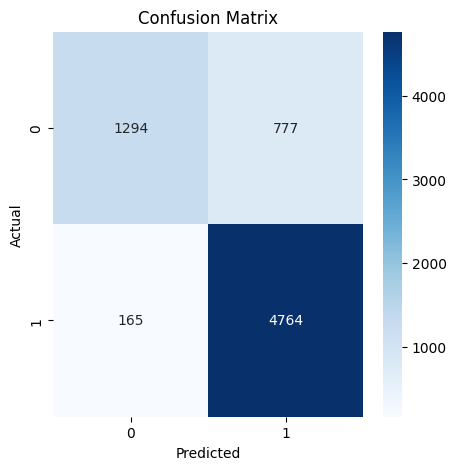

In [93]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [97]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Output the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 0.13457142857142856
Root Mean Squared Error (RMSE): 0.3668397859712446
